In [1]:
# leer csv metyricas modelo
# hacer plot de todas las metricas en una misma figura
# hacer tabla con los promedios para cada metrica y para cada entrenamiento

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
metricas = pd.read_csv(r"D:\TFG\tfg_git\pr_TopicModeling\metricas_modelo\v2\metricas.csv")

In [4]:
metricas[metricas["n_topicos"]==16]

,n_topicos,cv_scores,umass_scores,perplexity_scores,uci_scores
14,16,0.574363,-1.397193,-7.877345,-7.915537


In [3]:
metricasv1 = pd.read_csv("metricas_modelo/optimal_topics_fulldataset.csv")
metricasv2 = pd.read_csv("metricas_modelo/optimal_topicsv2_fulldataset.csv")

In [4]:
df2 = metricasv1[["n_topicos", "umass_scores", "perplexity_scores", "uci_scores"]].to_string(index=False)
print(df2)

 n_topicos  umass_scores  perplexity_scores  uci_scores
         2     -0.793906          -0.012523  -11.486857
         3     -0.933037          -0.012700  -11.573241
         4     -0.703572          -0.013181  -11.715760
         5     -3.062087          -0.013470  -11.910760
         6     -2.798822          -0.014055  -11.720266
         7     -2.274750          -0.014441  -11.432521
         8     -2.455411          -0.014881  -11.718705
         9     -2.007413          -0.015262  -11.870005
        10     -1.855296          -0.015695  -11.546031
        11     -2.321504          -0.016110  -10.952986
        12     -2.506156          -0.016356  -11.210467
        13     -2.509946          -0.016695   -2.641471
        14     -2.671610          -0.016934   -0.195001
        15     -2.675928          -0.017166   -0.963057
        16     -2.868138          -0.017127    1.127107
        17     -2.899249          -0.017432    0.500659
        18     -2.914961          -0.017689    0

In [5]:
metricasv1.mean()

n_topicos            15.500000
cv_scores             0.439865
umass_scores         -2.522962
perplexity_scores    -0.016819
uci_scores           -3.920641
dtype: float64

In [11]:
metricasv2.mean()

n_topicos            15.500000
cv_scores             0.387236
umass_scores         -3.488022
perplexity_scores    -0.013196
uci_scores           -4.073659
dtype: float64

In [13]:
print([(0.439865 + 0.387236)/2, 
       (-2.522962 + -3.488022)/2,
       (-3.920641 + -4.073659)/2, 
       (-0.016819 +-0.013196)/2
])

[0.41355050000000004, -3.0054920000000003, -3.99715, -0.0150075]


In [7]:
topicos = metricasv1.n_topicos            

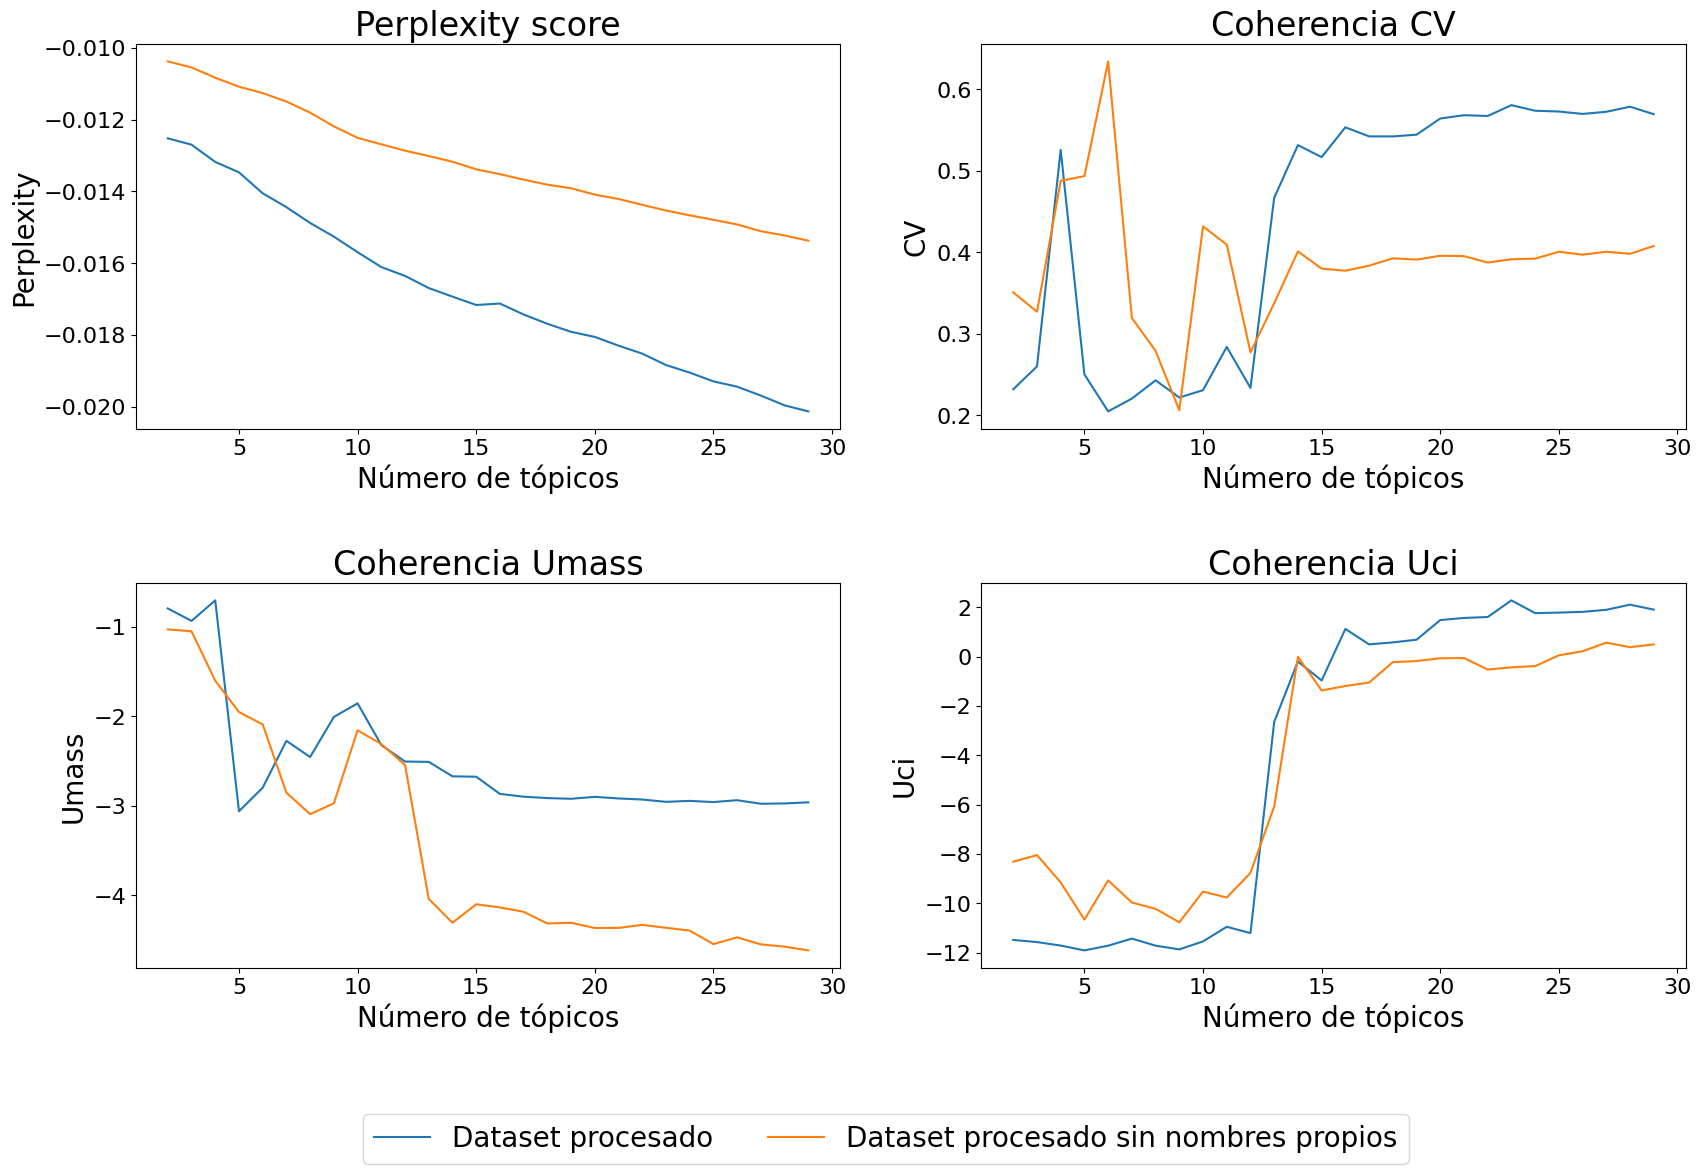

In [9]:
topicos = metricasv1.n_topicos            
fig = plt.figure(figsize=(20, 12))

label1 = "Dataset procesado"
label2 = "Dataset procesado sin nombres propios"
title_fsize=24
# Gráfica 1
ax1 = fig.add_subplot(2, 2, 1)
line1, = ax1.plot(topicos, metricasv1.perplexity_scores, label=label1)
line2, = ax1.plot(topicos, metricasv2.perplexity_scores, label=label2)
ax1.set_xlabel("Número de tópicos", fontsize=20)
ax1.set_ylabel("Perplexity", fontsize=20)
ax1.set_title("Perplexity score", fontsize=title_fsize)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)

# Gráfica 2
ax2 = fig.add_subplot(2, 2, 2)
line3, = ax2.plot(topicos, metricasv1.cv_scores, label=label1)
line4, = ax2.plot(topicos, metricasv2.cv_scores, label=label2)
ax2.set_xlabel("Número de tópicos", fontsize=20)
ax2.set_ylabel("CV", fontsize=20)
ax2.set_title("Coherencia CV", fontsize=title_fsize)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)

# Gráfica 3
ax3 = fig.add_subplot(2, 2, 3)
line5, = ax3.plot(topicos, metricasv1.umass_scores, label=label1)
line6, = ax3.plot(topicos, metricasv2.umass_scores, label=label2)
ax3.set_xlabel("Número de tópicos", fontsize=20)
ax3.set_ylabel("Umass", fontsize=20)
ax3.set_title("Coherencia Umass", fontsize=title_fsize)
ax3.tick_params(axis='x', labelsize=16)
ax3.tick_params(axis='y', labelsize=16)

# Gráfica 4
ax4 = fig.add_subplot(2, 2, 4)
line7, = ax4.plot(topicos, metricasv1.uci_scores, label=label1)
line8, = ax4.plot(topicos, metricasv2.uci_scores, label=label2)
ax4.set_xlabel("Número de tópicos", fontsize=20)
ax4.set_ylabel("Uci", fontsize=20)
ax4.set_title("Coherencia Uci", fontsize=title_fsize)
ax4.tick_params(axis='x', labelsize=16)
ax4.tick_params(axis='y', labelsize=16)

# Añadir leyenda en el centro inferior del gráfico
lines = [line1, line2]
labels = [line.get_label() for line in lines]
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0), ncol=2, fontsize=20)

plt.subplots_adjust(hspace=0.4)  # Ajuste de espacio vertical entre subplots

plt.show()
